## Differentiation animation

This notebook will generate an animation showing the derivative of a custom user function

In [1]:
user_function = input("f(x) = ")

f(x) = x + 1/x + sin(x)


In [2]:
outfile = input("Save animation to: ")

Save animation to: x+x^-1+sinx.gif


In [15]:
xmin = -10     # minimum x
xmax = 10      # maximum x
num = 2*10**2    # number of points

In [16]:
from matplotlib.animation import FuncAnimation

import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import mode

from sympy import lambdify, latex
from sympy.abc import *
from sympy.parsing.sympy_parser import *

In [17]:
transformations = standard_transformations + (implicit_multiplication, function_exponentiation)

user_expr = parse_expr(user_function, transformations=transformations)

In [18]:
f = lambdify(x, user_expr)

In [19]:
def f_prime(x, dx):
    return (f(x + dx) - f(x))/dx

def tangent(x, m, a, b): # tangent
    return m*(x - a) + b

In [20]:
X = np.linspace(xmin, xmax, num)
dx = mode(np.diff(X)).mode[0]

In [21]:
Y = f(X)
Y_prime = f_prime(X, dx)

In [22]:
# Deal with extreme values
def remove_extreme(X, Y=Y, Y_prime=Y_prime):
    iqr = np.percentile(np.append(Y,Y_prime), 75) - np.percentile(np.append(Y,Y_prime), 25)
    lower = np.percentile(np.append(Y,Y_prime), 2.5) - iqr
    upper = np.percentile(np.append(Y,Y_prime), 97.5) + iqr
    
    return np.where((X <= lower)|(X >= upper), np.nan, X)

Y = remove_extreme(Y)
Y_prime = remove_extreme(Y_prime)

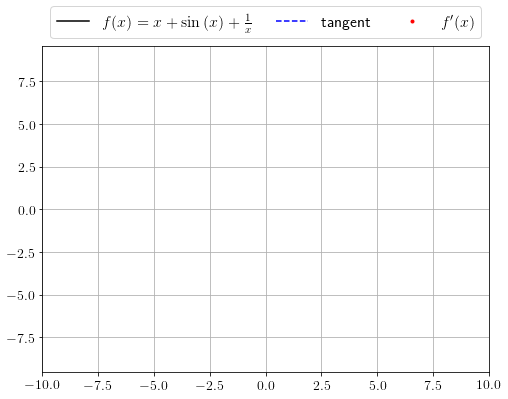

In [23]:
plt.rcParams.update({"text.usetex": True, "font.size": 14})

fig, ax = plt.subplots(figsize=(8,6))
line1, = plt.plot([], [], 'k-', label=f'$f(x) = {latex(user_expr)}$')
line2, = plt.plot([], [], 'b--', label='tangent')
line3, = plt.plot([], [], 'r.', label="$f'(x)$")
plt.grid()
plt.legend(bbox_to_anchor=(0, 1, 1, 0), loc="lower center", mode="expand", ncol=3, fontsize=16)

def init():
    ax.set_xlim(xmin, xmax)
    ax.set_ylim(np.nanmin(np.append(np.minimum(Y, Y_prime), 0)),
                np.nanmax(np.append(np.maximum(Y, Y_prime), 0)))
    
    line1.set_data([], [])
    line2.set_data([], [])
    line3.set_data([], [])

    return line1, line2, line3

def update(i):
    T = tangent(X, f_prime(X[i], dx), X[i], f(X[i]))
    
    line1.set_data(X, Y)
    line2.set_data(X, T)
    line3.set_data(X[:i+1], Y_prime[:i+1])
    return line1, line2, line3

ani = FuncAnimation(fig, update, frames=len(X),
                    init_func=init, blit=True, interval=10**4/num)

In [24]:
ani.save(outfile, writer='imagemagick')

In [13]:
Y[:10]

array([-9.55597889, -9.54342371, -9.53550241, -9.53129175, -9.52983127,
       -9.53013301, -9.5311915 , -9.53199387, -9.53153014, -9.5288034 ])

In [14]:
Y_prime[:10]

array([ 0.12492404,  0.07881689,  0.04189607,  0.01453178, -0.00300232,
       -0.01053188, -0.00798359,  0.00461406,  0.02713106,  0.05933718])